In [1]:
%pylab inline
import pymc3 as pm
import theano.tensor as tt

Populating the interactive namespace from numpy and matplotlib


In [27]:
px0, py0 = 2., 1.
g = 7.567
m, h = 5., 10.
n_step = 1000
T = np.linspace(0, 1, n_step)
fmu = np.array([px0*T/m, -0.5*g*T**2+py0*T/m+h])

C = np.array([[0.1**2,0],[0,0.1**2]])
L = np.linalg.cholesky(C)
observed_xy = fmu + L.dot(np.random.randn(2, n_step))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [g]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1631.86draws/s]


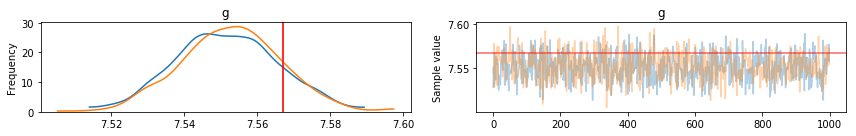

In [32]:
with pm.Model() as model:
    G = pm.Uniform('g', lower=5., upper=15.)
    MU = tt.stack([px0*T/m, -0.5*G*T**2+py0*T/m+h])
    Y = pm.MvNormal('y', mu=MU.T, chol=L, observed=observed_xy.T)
    trace = pm.sample(1000, tune=1000)
pm.traceplot(trace, lines=dict(g=g));